## Week 4: Assignment

## Task:To Conduct an in-depth Exploratory Data Analysis on a complex dataset. Focus on understanding data distributions, identifying missing values, detecting outliers, and uncovering relationships between variables. Utilize visualizations like histograms, box plots, and heatmaps to support your findings.

## Dataset : Titanic 

##  Titanic EDA Summary--

##  Business Goal:
Identify key factors influencing survival to help in transport policy or insurance risk assessment.

##  Key Findings:
- **Gender:** Females had much higher survival rate (~74%)
- **Class:** 1st Class passengers were most likely to survive
- **Fare:** Higher fare correlated with survival
- **Age:** Children (age < 10) had better chances
- **Family Size:** Lone travelers had lower survival
- **Cabin Info:** Having cabin info indicated higher survival

##  Features Engineered:
- `HasCabin`: Binary from Cabin
- `FamilySize` = SibSp + Parch + 1
- `IsAlone`: Binary from FamilySize
- `Title`: Extracted from Name (Mr, Mrs, Miss, etc.)

##  Visuals Used:
- Histograms, KDEs, Boxplots, Heatmaps
- Categorical bar plots by survival
- Fare vs Pclass/Survival analysis

---

#  Titanic Dataset - 

This notebook performs an **extensive exploratory data analysis (EDA)** on the Titanic dataset, treating it like a **real-world business problem**. Our objective is to **understand key factors influencing passenger survival**, uncover patterns, identify missing values, outliers, and relationships between variables, and support the findings with clear visualizations.

In [ ]:
# import necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [22]:
# Load dataset

df = pd.read_csv('Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##  Step 1: Data Overview

In [23]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [24]:

df.describe(include='all')


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


##  Step 2: Missing Value Analysis

In [4]:

missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100
missing_data = pd.DataFrame({'Missing Count': missing, 'Percentage': missing_percent})
missing_data = missing_data[missing_data['Missing Count'] > 0].sort_values(by='Percentage', ascending=False)
missing_data


,Missing Count,Percentage
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467


In [5]:

# Create binary feature from Cabin
df['HasCabin'] = df['Cabin'].notnull().astype(int)


##  Step 3: Univariate Analysis

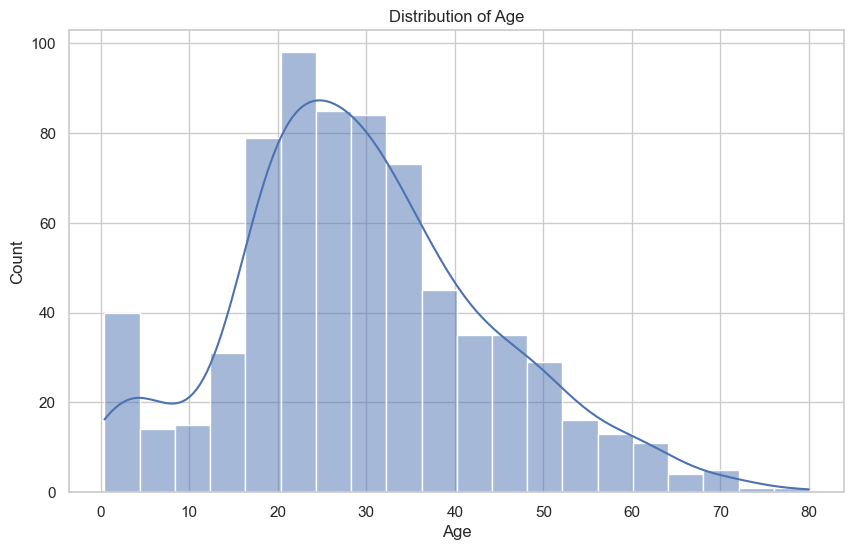

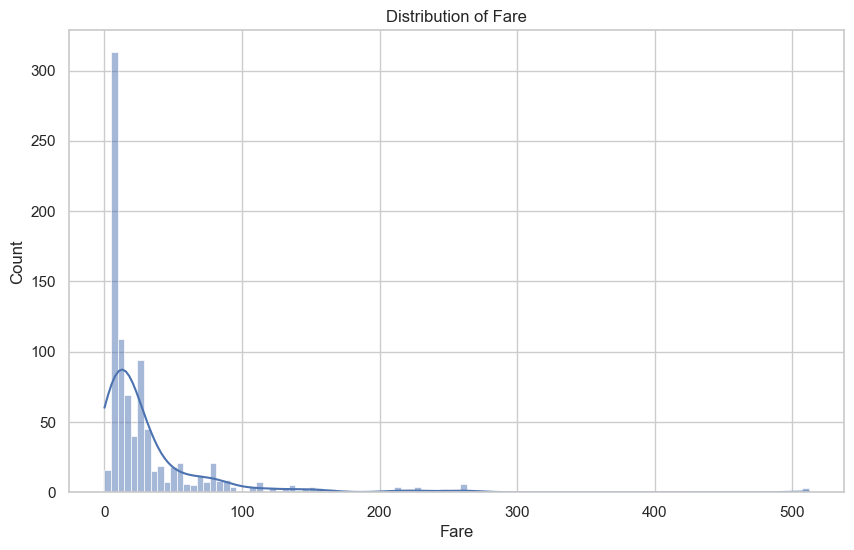

In [6]:

num_cols = ['Age', 'Fare']
for col in num_cols:
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


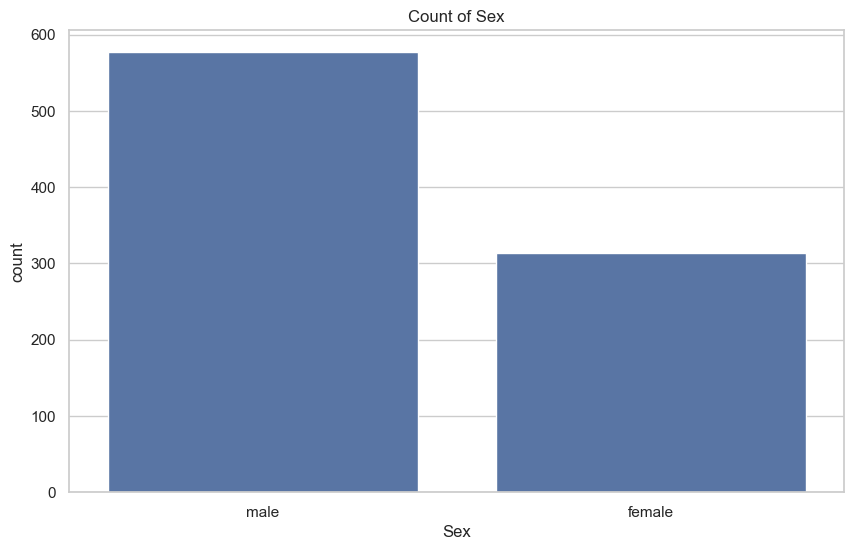

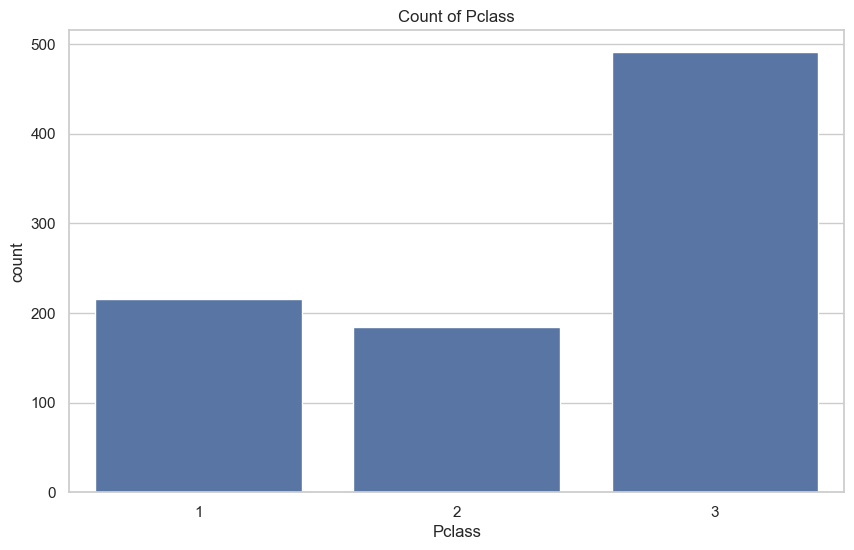

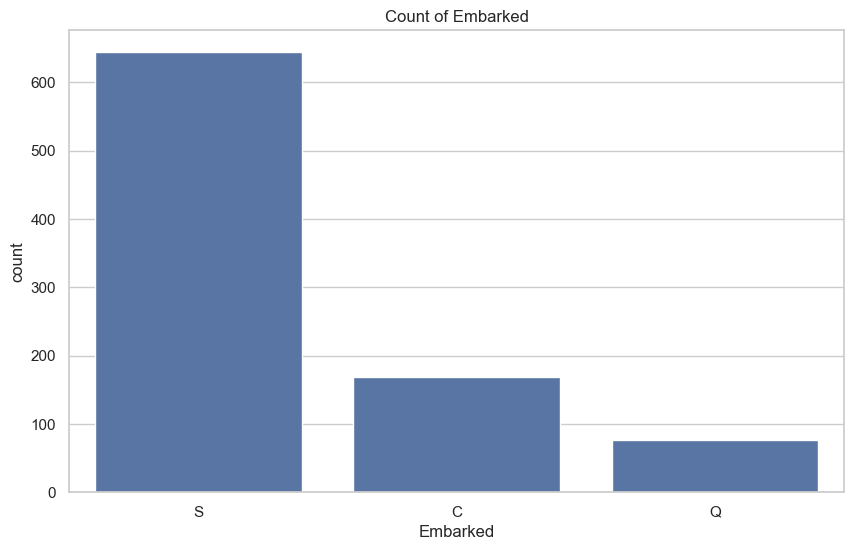

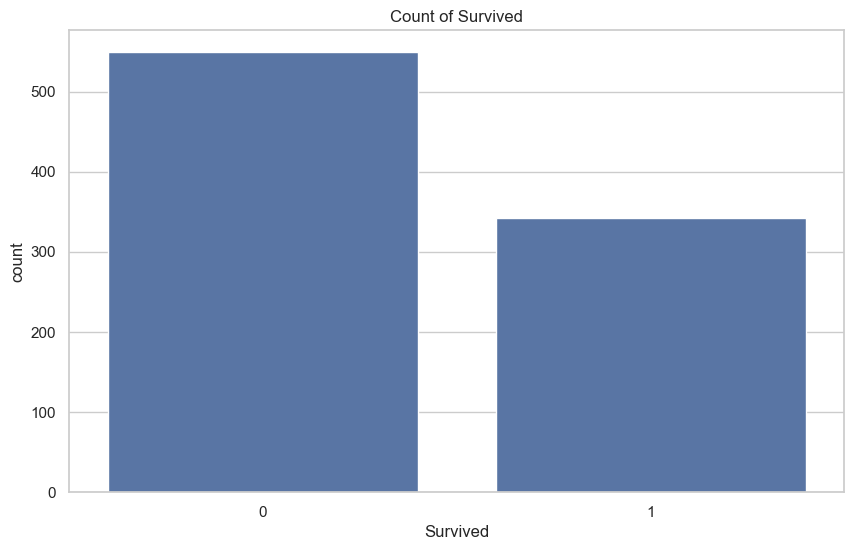

In [7]:

cat_cols = ['Sex', 'Pclass', 'Embarked', 'Survived']
for col in cat_cols:
    sns.countplot(x=col, data=df)
    plt.title(f'Count of {col}')
    plt.show()


##  Step 4: Outlier Detection

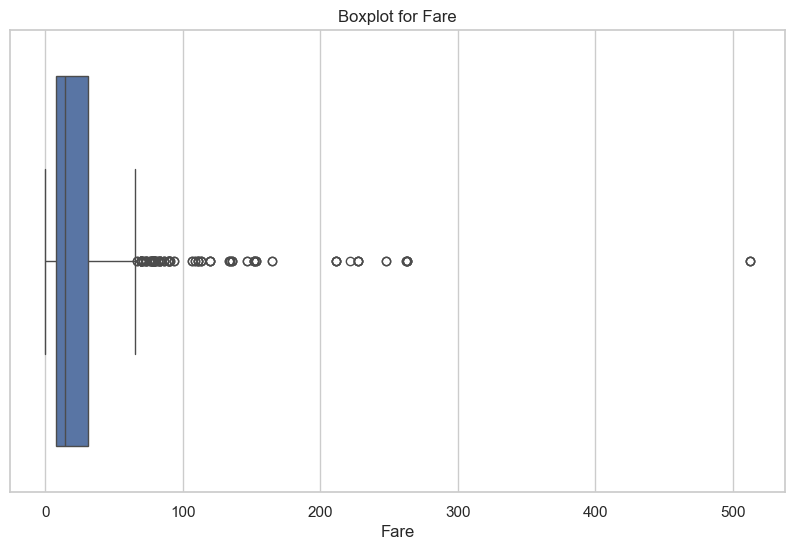

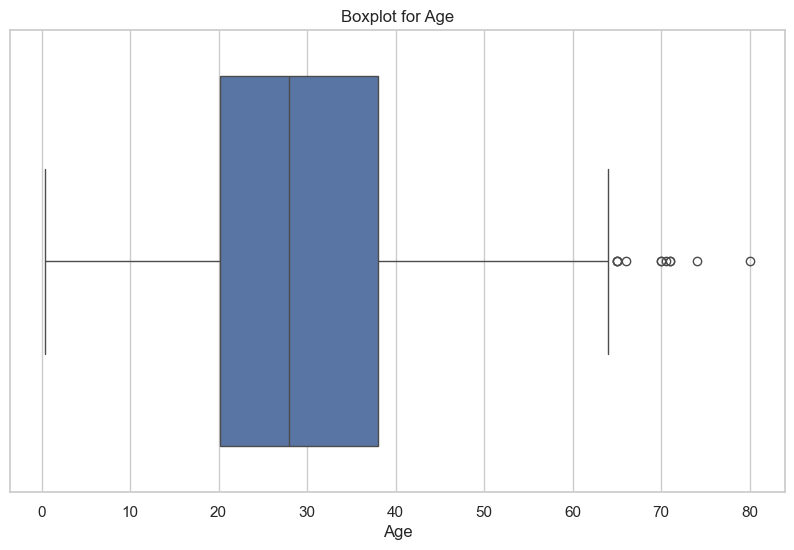

In [8]:

for col in ['Fare', 'Age']:
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
    plt.show()


In [9]:

# IQR method example for Fare
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Fare'] < Q1 - 1.5 * IQR) | (df['Fare'] > Q3 + 1.5 * IQR)]
len(outliers)


116

##  Step 5: Bivariate Analysis with Target Variable

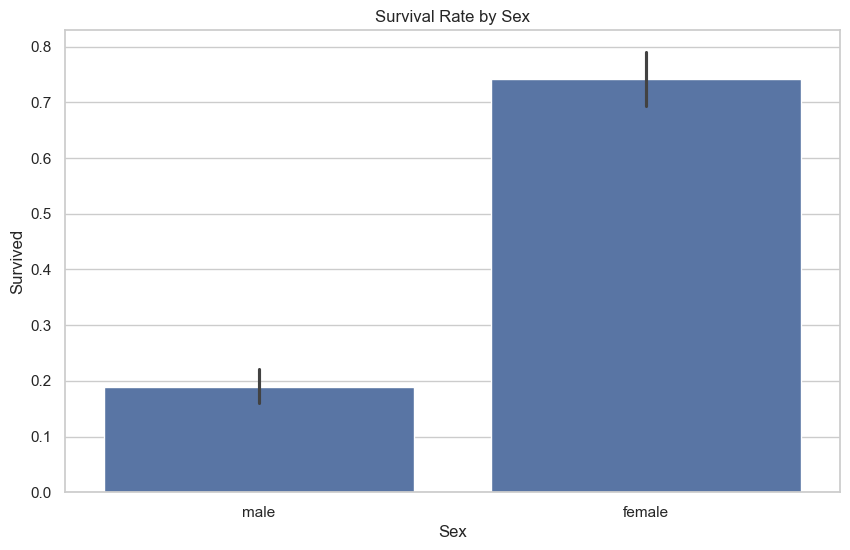

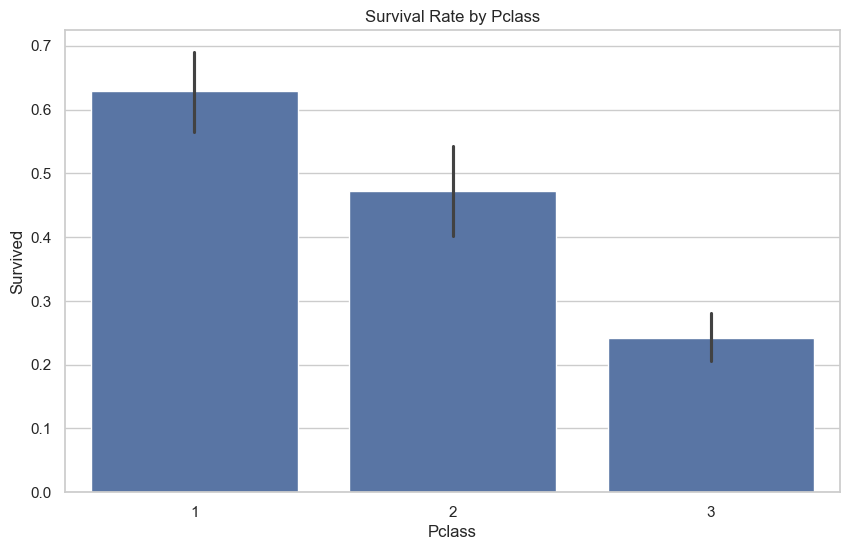

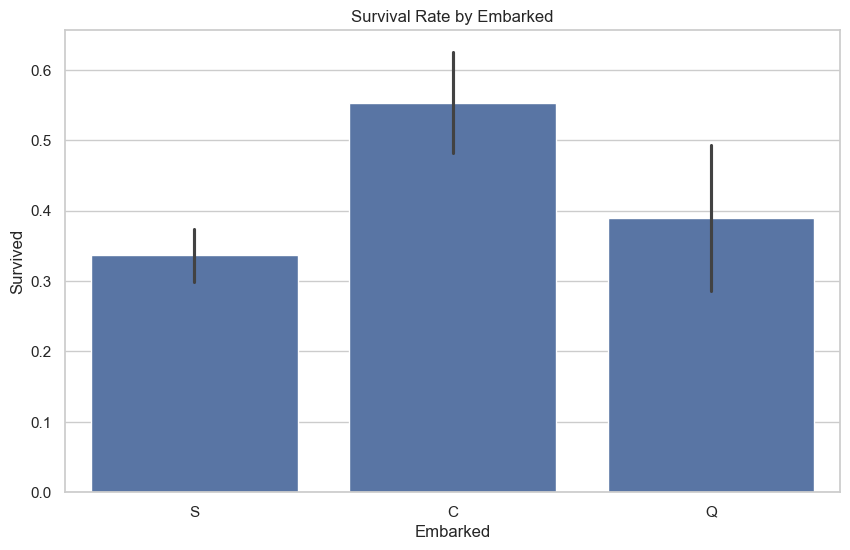

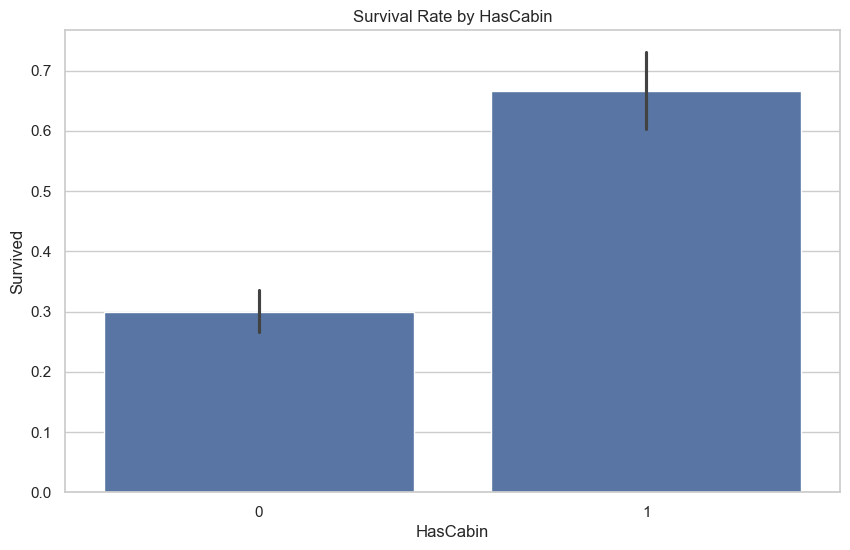

In [10]:

for col in ['Sex', 'Pclass', 'Embarked', 'HasCabin']:
    sns.barplot(x=col, y='Survived', data=df)
    plt.title(f'Survival Rate by {col}')
    plt.show()


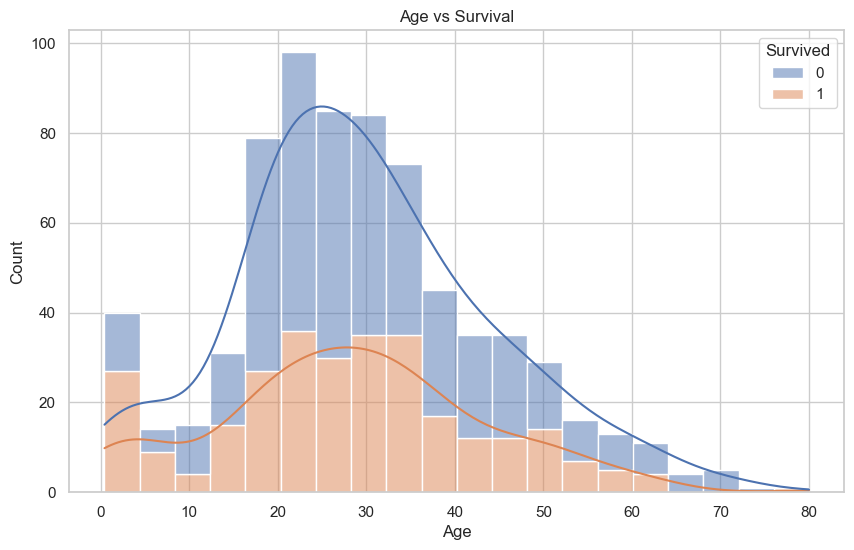

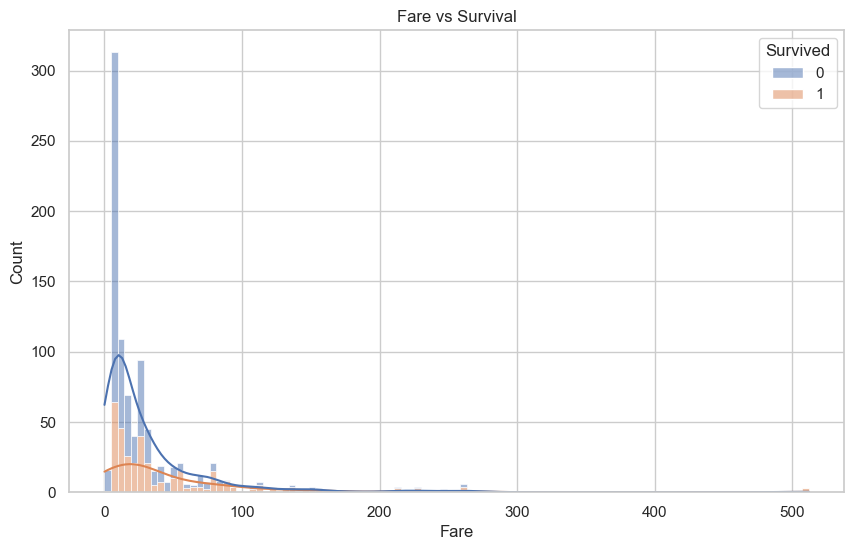

In [11]:

sns.histplot(data=df, x='Age', hue='Survived', kde=True, multiple='stack')
plt.title('Age vs Survival')
plt.show()

sns.histplot(data=df, x='Fare', hue='Survived', kde=True, multiple='stack')
plt.title('Fare vs Survival')
plt.show()


##  Step 6: Correlation Heatmap

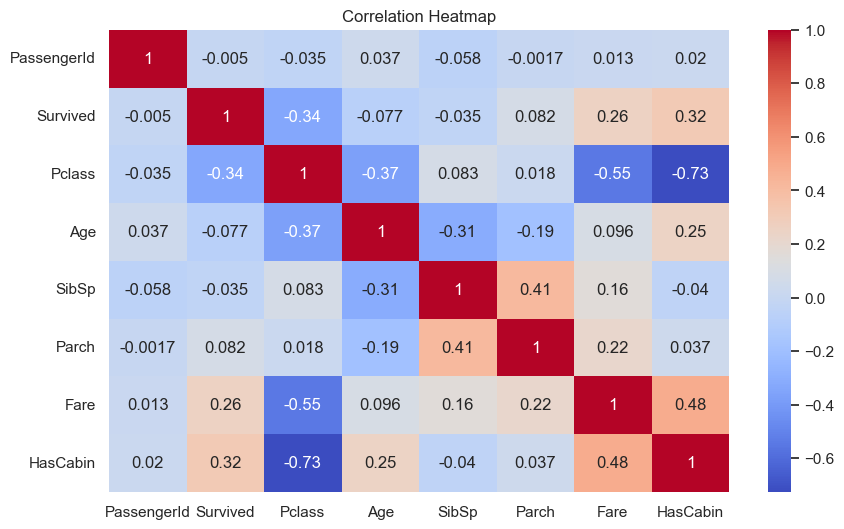

In [12]:

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


##  Step 7: Feature Engineering

In [13]:

df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


<>:3: SyntaxWarning: invalid escape sequence '\.'
<>:3: SyntaxWarning: invalid escape sequence '\.'
C:\Users\rahul\AppData\Local\Temp\ipykernel_4332\4209694351.py:3: SyntaxWarning: invalid escape sequence '\.'
  df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


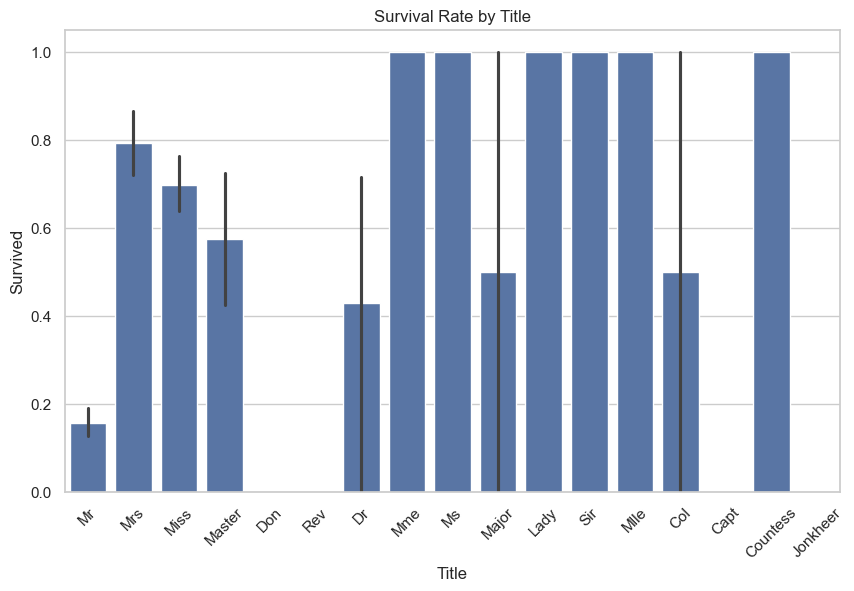

In [14]:

sns.barplot(x='Title', y='Survived', data=df)
plt.xticks(rotation=45)
plt.title("Survival Rate by Title")
plt.show()


##  Step 8: Visualizations Supporting Business Insights

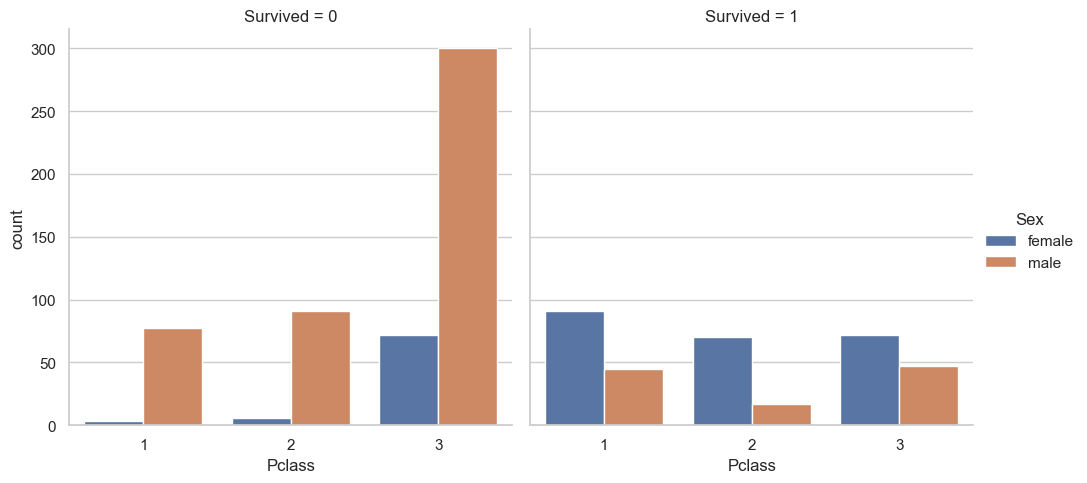

In [15]:

sns.catplot(x='Pclass', hue='Sex', col='Survived', data=df, kind='count')
plt.show()


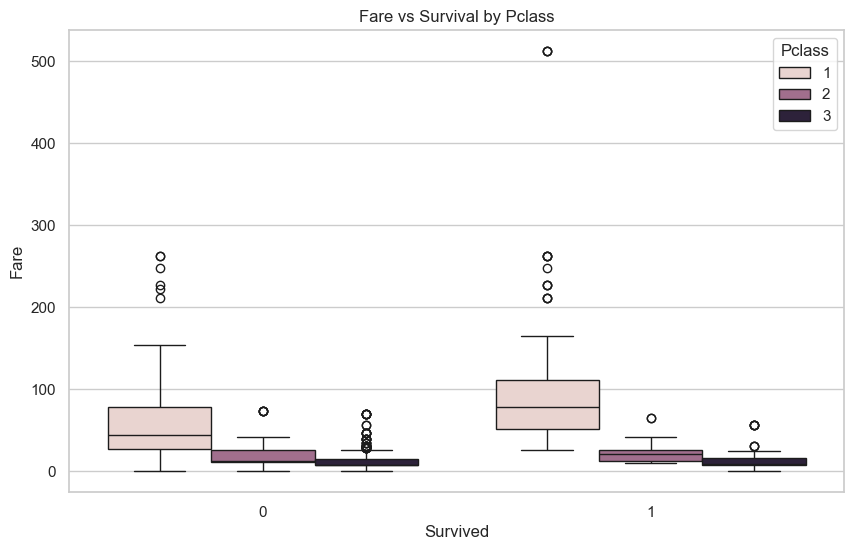

In [16]:

sns.boxplot(x='Survived', y='Fare', hue='Pclass', data=df)
plt.title("Fare vs Survival by Pclass")
plt.show()


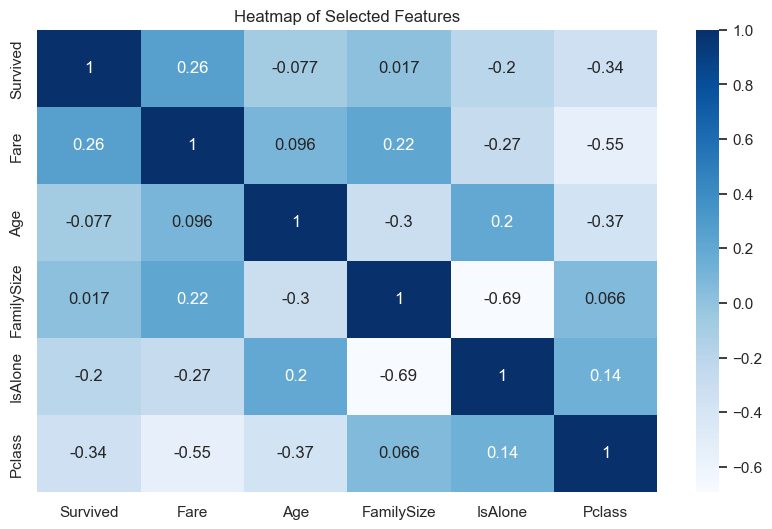

In [17]:

selected = df[['Survived', 'Fare', 'Age', 'FamilySize', 'IsAlone', 'Pclass']]
sns.heatmap(selected.corr(), annot=True, cmap='Blues')
plt.title("Heatmap of Selected Features")
plt.show()
